# Import modules

In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

### Cleaning the data

In [2]:
ca_videos = pd.read_csv(filepath_or_buffer='./youtube_data/CAvideos.csv', encoding='ISO-8859-1')
ca_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [3]:
with open(file='./youtube_data/US_category_id.json', mode='r') as file:
    data = json.load(file)
    categories = {int(category['id']): (category['snippet']['title'], category['snippet']['assignable']) for category in data['items']}

categories

{1: ('Film & Animation', True),
 2: ('Autos & Vehicles', True),
 10: ('Music', True),
 15: ('Pets & Animals', True),
 17: ('Sports', True),
 18: ('Short Movies', False),
 19: ('Travel & Events', True),
 20: ('Gaming', True),
 21: ('Videoblogging', False),
 22: ('People & Blogs', True),
 23: ('Comedy', True),
 24: ('Entertainment', True),
 25: ('News & Politics', True),
 26: ('Howto & Style', True),
 27: ('Education', True),
 28: ('Science & Technology', True),
 29: ('Nonprofits & Activism', True),
 30: ('Movies', False),
 31: ('Anime/Animation', False),
 32: ('Action/Adventure', False),
 33: ('Classics', False),
 34: ('Comedy', False),
 35: ('Documentary', False),
 36: ('Drama', False),
 37: ('Family', False),
 38: ('Foreign', False),
 39: ('Horror', False),
 40: ('Sci-Fi/Fantasy', False),
 41: ('Thriller', False),
 42: ('Shorts', False),
 43: ('Shows', False),
 44: ('Trailers', False)}

### Exploring the data

In [4]:
ca_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

In [5]:
ca_videos.describe()

,category_id,views,likes,dislikes,comment_count
count,"40,881.00","40,881.00","40,881.00","40,881.00","40,881.00"
mean,20.80,"1,147,035.91","39,582.69","2,009.20","5,042.97"
std,6.78,"3,390,913.02","132,689.53","19,008.37","21,579.02"
min,1.00,733.00,0.00,0.00,0.00
25%,20.00,"143,902.00","2,191.00",99.00,417.00
50%,24.00,"371,204.00","8,780.00",303.00,"1,301.00"
75%,24.00,"963,302.00","28,717.00",950.00,"3,713.00"
max,43.00,"137,843,120.00","5,053,338.00","1,602,383.00","1,114,800.00"


In [6]:
ca_videos['trending_date'] = pd.to_datetime(arg=ca_videos['trending_date'], format='%y.%d.%m')
ca_videos['publish_time'] = pd.to_datetime(arg=ca_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
ca_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [7]:
ca_videos.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
dtype: object

In [8]:
ca_videos['category'] = ca_videos['category_id'].map(categories).str[0]
ca_videos['category'].head()

0            Music
1           Comedy
2           Comedy
3    Entertainment
4            Music
Name: category, dtype: object

### **Question 1: How many trending videos are there in the dataset each year?**

In [9]:
ca_videos.groupby(by=ca_videos['trending_date'].dt.year)['video_id'].nunique().reset_index().rename(
    columns={'trending_date': 'year', 'video_id': 'trending_videos_count'}
)

,year,trending_videos_count
0,2017,5477
1,2018,19043


### Visualize

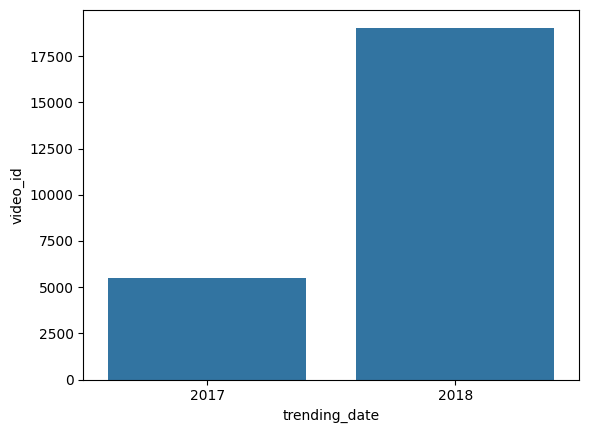

In [10]:
sns.barplot(data=ca_videos.groupby(by=ca_videos['trending_date'].dt.year)['video_id'].nunique().reset_index(),
            x='trending_date', y='video_id')
plt.show()

### **Question 2: How the distribution of views in each country?**

In [11]:
ca_videos.groupby(by='category')['views'].sum().sort_values(ascending=False)

category
Entertainment            13671215509
Music                    13179850194
Comedy                    3708438785
People & Blogs            3228227926
Sports                    2997652188
Film & Animation          2939060844
News & Politics           1614610043
Howto & Style             1570846611
Science & Technology      1425090421
Gaming                    1241532385
Education                  531773343
Pets & Animals             235592173
Autos & Vehicles           200066074
Travel & Events            143746952
Nonprofits & Activism      115601623
Shows                       71549508
Movies                      17120490
Name: views, dtype: int64

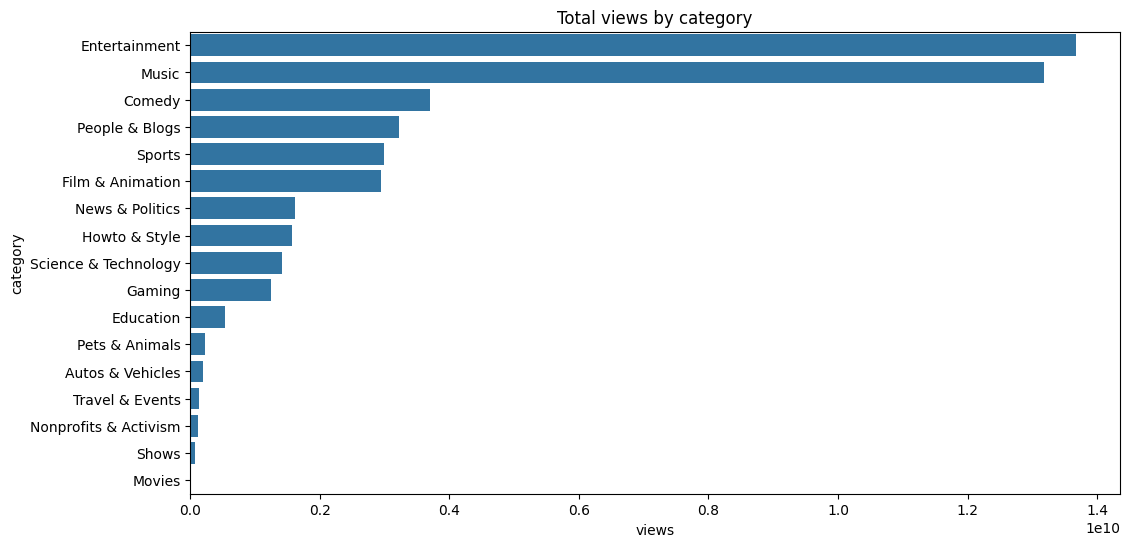

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=ca_videos.groupby(by='category', as_index=False)['views'].sum().sort_values(by='views', ascending=False),
            x='views', y='category', orient='h')
plt.title(label='Total views by category')
plt.show()

### ***Question 3: How the distribution of likes in each country?***

### ***Question 4: How the distribution of dislikes in each country?***

### ***Question 5: How the distribution of comments in each country?***

### Question 1: Who is the owner of the most trending videos on YouTube each month?

In the Canada country:
- In the last period of 2017, **Good Mythical Morning** and **Vikatan TV** respectively are the channel owning the most videos in the Youtube's trending in 11/2017 and 12/2017.
- The channel **The Young Turks** is the channel has the highest number of trending videos on Youtube in 01/2018.
- The channel **CNN** stands on top with the highest number of trending videos on Youtube from 02/2018 to 05/2018.
- The channel **Alhayah TV Network** has over 10 videos which enter the trending board on Youtube in 06/2018.

### Question 2: What type of videos do people watch the most?

### News & Politics
- Most of the trending videos on YouTube during 01/2018 were from The Young Turks, while those from 02/2018 to 05/2018 were from CNN.
- These channels primarily focus on News & Politics, as indicated by the video topics.
- This suggests that people were particularly interested in News & Politics content from these channels during this period.

### Entertainment & Shows

- Trending videos in 11/2017 came from Good Mythical Morning, in 12/2017 from Vikatan TV, and in 06/2018 from Alhayah TV Network.
- These channels predominantly feature Entertainment & Shows content.

### **Question 6: Trending duration**

In [13]:
trending_duration = ca_videos['video_id'].value_counts()
trending_duration = trending_duration[trending_duration == trending_duration.max()].reset_index()
trending_duration = trending_duration.merge(right=ca_videos[['video_id', 'title']].drop_duplicates(), on='video_id')
trending_duration = trending_duration.reindex(columns=['video_id', 'title', 'count'])
trending_duration

,video_id,title,count
0,l_lblj8Cq0o,"G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi ...",8
1,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,8
2,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,8
3,UceaB4D0jpo,Post Malone - rockstar ft. 21 Savage,8


### **Question 7: Channels with the most number of trending videos**

In [14]:
ca_videos.groupby(by='channel_title')['video_id'].nunique().sort_values(ascending=False).head(n=10)

channel_title
VikatanTV           159
SET India           154
MSNBC               152
RadaanMedia         149
The Young Turks     147
ARY Digital         135
CNN                 118
SAB TV              118
The Real Daytime    114
ESPN                113
Name: video_id, dtype: int64

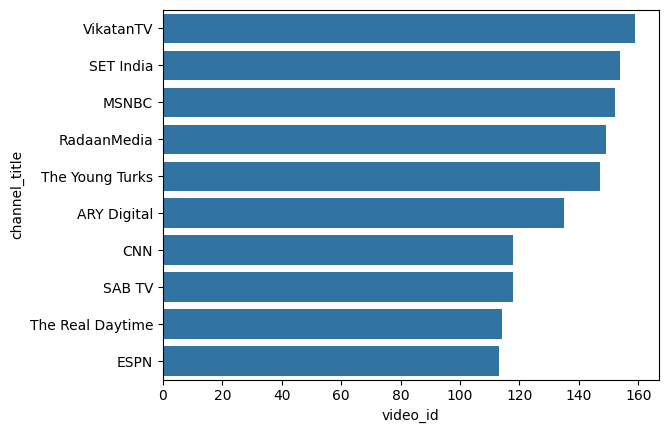

In [15]:
sns.barplot(data=ca_videos.groupby(by='channel_title')['video_id'].nunique().sort_values(ascending=False).head(n=10),
            orient='h')
plt.show()

### **Question 8: Which public months/quarters have the largest amount of trending videos?**

In [16]:
ca_videos.groupby(by=ca_videos['publish_time'].dt.month)['video_id'].nunique()

publish_time
1     3397
2     3233
3     3785
4     3016
5     3797
6     1596
7        2
8        1
9        9
10       8
11    2122
12    3463
Name: video_id, dtype: int64

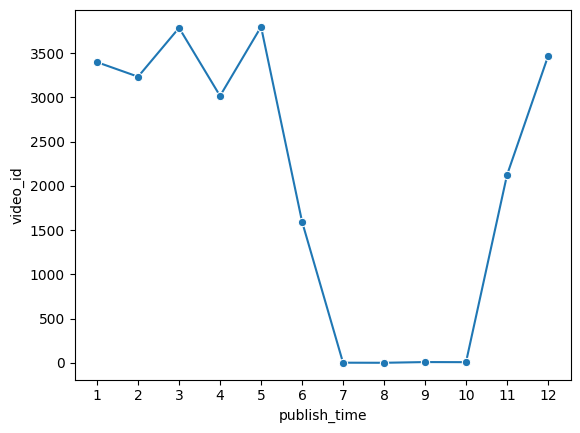

In [17]:
sns.lineplot(data=ca_videos.groupby(by=ca_videos['publish_time'].dt.month)['video_id'].nunique(), marker='o')
plt.xticks(ticks=range(1, 13), labels=range(1, 13))
plt.show()

In [18]:
ca_videos.groupby(by=ca_videos['publish_time'].dt.quarter)['video_id'].nunique()

publish_time
1    10415
2     8408
3       12
4     5593
Name: video_id, dtype: int64

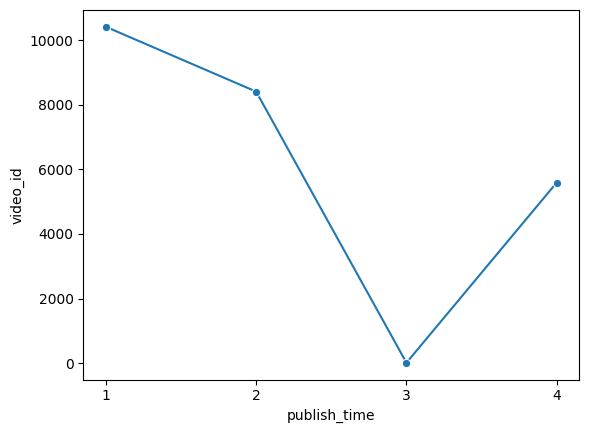

In [19]:
sns.lineplot(data=ca_videos.groupby(by=ca_videos['publish_time'].dt.quarter)['video_id'].nunique(), marker='o')
plt.xticks(ticks=range(1, 5), labels=range(1, 5))
plt.show()

### **Question 9: Capitalized/Non-capitalized title**

In [20]:
upper_titles = ca_videos[ca_videos['title'] == ca_videos['title'].str.upper()]
lower_titles = ca_videos[ca_videos['title'] == ca_videos['title'].str.lower()]
ca_videos[~(ca_videos.index.isin(upper_titles.index) | ca_videos.index.isin(lower_titles.index))]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40875,7E1np354AEc,2018-06-14,ÐÐµÑÐµÑ Ñ ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸ÑÐ¾Ð¼ Ð¡Ð¾Ð»Ð¾Ð²Ñ...,Ð Ð¾ÑÑÐ¸Ñ 24,24,2018-06-13 23:53:29,"Ð¿Ð¾ÐµÐ´Ð¸Ð½Ð¾Ðº|""Ð¼Ð¸Ñ ÐµÐµÐ²""|""Ð¿Ð¾Ð»Ð½ÑÐ¹ ...",201847,1568,407,537,https://i.ytimg.com/vi/7E1np354AEc/default.jpg,False,False,False,ÐÐµÑÐµÑ Ñ ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸ÑÐ¾Ð¼ Ð¡Ð¾Ð»Ð¾Ð²Ñ...,Entertainment
40876,sGolxsMSGfQ,2018-06-14,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13 18:00:07,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,ð¨ NEW MERCH! http://amzn.to/annoyingorange ...,Entertainment
40877,8HNuRNi8t70,2018-06-14,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13 19:01:18,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,âº Retrouvez vos programmes prÃ©fÃ©rÃ©s : htt...,Entertainment
40878,GWlKEM3m2EE,2018-06-14,KINGDOM HEARTS III â SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,2018-06-11 17:30:53,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...,Gaming


### **Question 10: Title length**

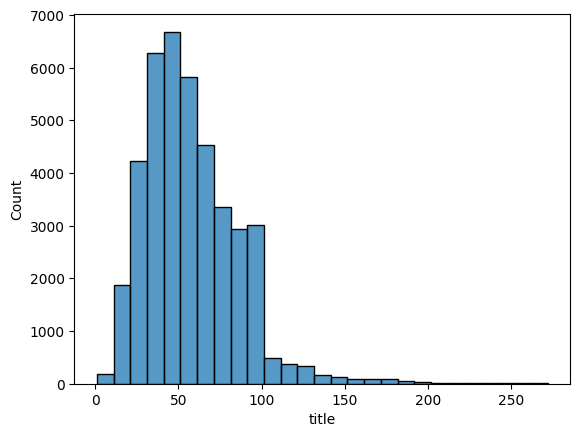

In [21]:
sns.histplot(data=ca_videos['title'].str.len(), binwidth=10)
plt.show()

### **Question 11: Category proportion**

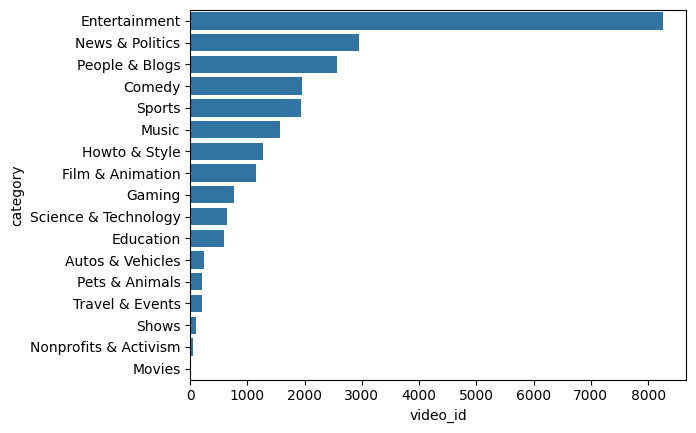

In [26]:
sns.barplot(data=ca_videos.groupby(by='category')['video_id'].nunique().sort_values(ascending=False), orient='h')
plt.show()

### **Question 12: Average views for each category**

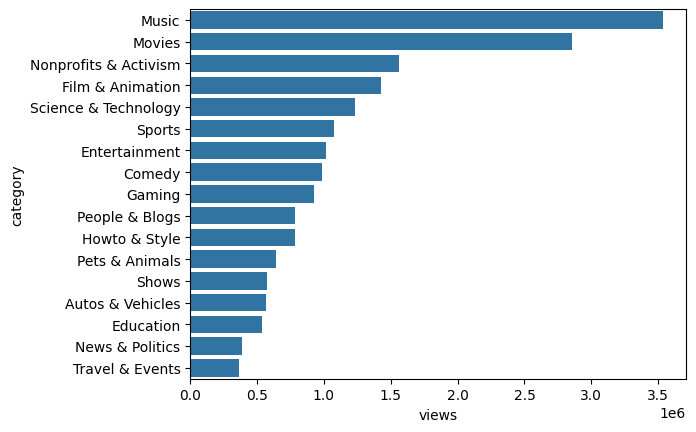

In [23]:
sns.barplot(data=ca_videos.groupby(by='category')['views'].mean().sort_values(ascending=False), orient='h')
plt.show()

In [48]:
videos_by_category = ca_videos.groupby(by='category', as_index=False).agg({'video_id': 'nunique', 'views': 'mean'}).sort_values(by='video_id', ascending=False)
videos_by_category

,category,video_id,views
3,Entertainment,8252,"1,016,371.68"
9,News & Politics,2943,"388,220.74"
11,People & Blogs,2560,"786,413.62"
1,Comedy,1948,"982,888.63"
15,Sports,1932,"1,075,583.85"
8,Music,1568,"3,532,524.84"
6,Howto & Style,1272,"782,683.91"
4,Film & Animation,1152,"1,426,728.57"
5,Gaming,772,"923,759.22"
13,Science & Technology,636,"1,233,844.52"


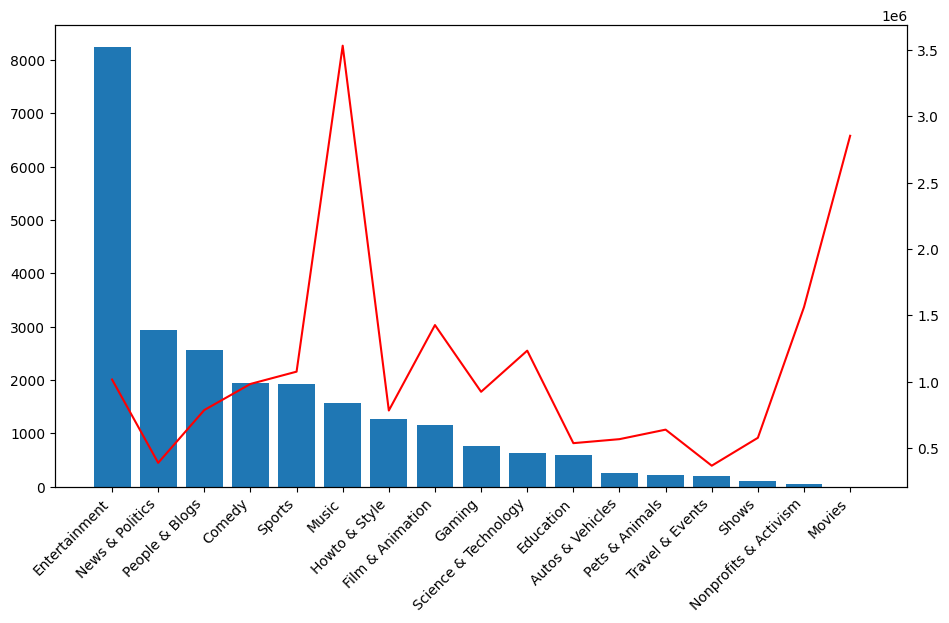

In [53]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(11, 6))
ax2 = ax1.twinx()

ax1.bar(x='category', height='video_id', data=videos_by_category)
ax2.plot('category', 'views', data=videos_by_category, color='red')

ax1.set_xticks(ticks=videos_by_category['category'], labels=videos_by_category['category'], rotation=45, ha='right')
plt.show()

### **Question 13: Ratio likes/dislikes for each category**

In [54]:
ca_videos['likes/dislikes'] = (ca_videos['likes'] + 1) / (ca_videos['dislikes'] + 1)
ca_videos['likes/dislikes'].head()

0   18.13
1   75.66
2   27.35
3   66.45
4   77.51
Name: likes/dislikes, dtype: float64

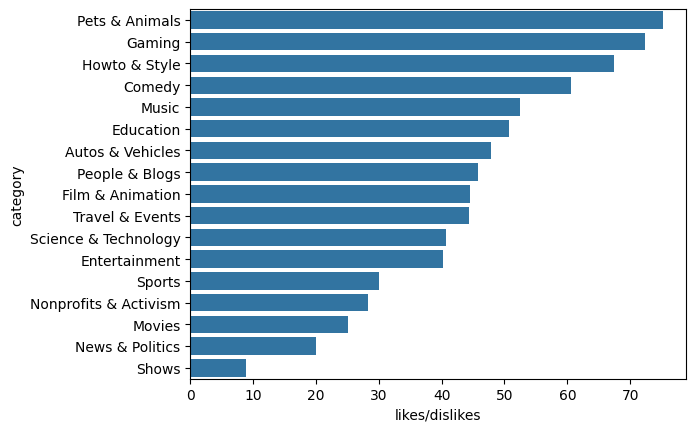

In [56]:
sns.barplot(data=ca_videos.groupby(by='category')['likes/dislikes'].mean().sort_values(ascending=False), orient='h')
plt.show()